<a href="https://colab.research.google.com/github/tarunpanda001/Machine_learning_Models/blob/main/LogisticRegression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression

In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

Downloading...
From: https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
To: /content/churn_logistic.csv
100% 494k/494k [00:00<00:00, 112MB/s]


In [86]:
churn = pd.read_csv("churn_logistic.csv")
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [87]:
churn.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Intl Plan', 'VMail Plan', 'Day Calls',
       'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge',
       'Intl Calls', 'Intl Charge', 'State', 'Area Code', 'Phone', 'Churn'],
      dtype='object')

In [89]:
churn.shape

(5700, 21)

In [91]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  5700 non-null   int64  
 1   VMail Message   5700 non-null   int64  
 2   Day Mins        5700 non-null   float64
 3   Eve Mins        5700 non-null   float64
 4   Night Mins      5700 non-null   float64
 5   Intl Mins       5700 non-null   float64
 6   CustServ Calls  5700 non-null   int64  
 7   Intl Plan       5700 non-null   int64  
 8   VMail Plan      5700 non-null   int64  
 9   Day Calls       5700 non-null   int64  
 10  Day Charge      5700 non-null   float64
 11  Eve Calls       5700 non-null   int64  
 12  Eve Charge      5700 non-null   float64
 13  Night Calls     5700 non-null   int64  
 14  Night Charge    5700 non-null   float64
 15  Intl Calls      5700 non-null   int64  
 16  Intl Charge     5700 non-null   float64
 17  State           5700 non-null   o

## Apllying Feature Scalling

In [92]:
churn['Total Mins'] = churn['Day Mins'] + churn['Eve Mins'] + churn['Night Mins'] + churn['Intl Mins']
churn['Total Charge'] = churn['Day Charge'] + churn['Eve Charge'] + churn['Night Charge'] + churn['Intl Charge']

In [93]:
churn['Day Mins per Call'] = churn['Day Mins'] / (churn['Day Calls'] + 1)
churn['Eve Mins per Call'] = churn['Eve Mins'] / (churn['Eve Calls'] + 1)
churn['Night Mins per Call'] = churn['Night Mins'] / (churn['Night Calls'] + 1)
churn['Intl Mins per Call'] = churn['Intl Mins'] / (churn['Intl Calls'] + 1)

In [94]:
churn['Intl Call Ratio'] = churn['Intl Calls'] / (churn['Day Calls'] + churn['Eve Calls'] + churn['Night Calls'] + 1)
churn['Customer Service Ratio'] = churn['CustServ Calls'] / (churn['Total Mins'] + 1)

In [95]:
churn['Charge per Min'] = churn['Total Charge'] / (churn['Total Mins'] + 1)
churn['Day to Night Mins Ratio'] = churn['Day Mins'] / (churn['Night Mins'] + 1)
churn['Day to Eve Mins Ratio'] = churn['Day Mins'] / (churn['Eve Mins'] + 1)

In [96]:
churn['High_CustServ_Calls'] = (churn['CustServ Calls'] > 3).astype(int)
churn['Has_Intl_Plan'] = churn['Intl Plan'].apply(lambda x: 1 if x=='yes' else 0)
churn['Has_VMail_Plan'] = churn['VMail Plan'].apply(lambda x: 1 if x=='yes' else 0)

## Prepare features and target

In [98]:
X = churn.drop([
    'Churn',          # target
    'Phone',
    'Day Mins', 'Eve Mins', 'Night Mins', 'Intl Mins',  # replaced by Total Mins and ratios
    'Day Charge', 'Eve Charge', 'Night Charge', 'Intl Charge',  # replaced by Total Charge
    'Day Calls', 'Eve Calls', 'Night Calls', 'Intl Calls',      # replaced by per-call features
    'CustServ Calls',  # replaced by High_CustServ_Calls or ratio
    'Intl Plan', 'VMail Plan'  # already encoded as binary
], axis=1)
y = churn['Churn']


In [100]:
X

,Account Length,VMail Message,State,Area Code,Total Mins,Total Charge,Day Mins per Call,Eve Mins per Call,Night Mins per Call,Intl Mins per Call,Intl Call Ratio,Customer Service Ratio,Charge per Min,Day to Night Mins Ratio,Day to Eve Mins Ratio,High_CustServ_Calls,Has_Intl_Plan,Has_VMail_Plan
0,128,25,KS,415,717.2,75.56,2.388288,1.974000,2.659783,2.500000,0.009967,0.001392,0.105207,1.078958,1.336190,0,0,0
1,107,26,OH,415,625.2,59.24,1.303226,1.879808,2.446154,3.425000,0.009091,0.001597,0.094602,0.632733,0.822392,0,0,0
2,137,0,NJ,415,539.4,62.29,2.116522,1.091892,1.548571,2.033333,0.015198,0.000000,0.115266,1.487775,1.991817,0,0,0
3,84,0,OH,408,564.8,66.80,4.158333,0.695506,2.187778,0.825000,0.028112,0.003535,0.118063,1.512885,4.759936,0,0,0
4,75,0,OK,415,512.0,52.09,1.462281,1.205691,1.531967,2.525000,0.008403,0.005848,0.101540,0.887174,1.116544,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,224,0,DE,510,548.9,53.67,1.715000,1.538462,2.062136,1.666667,0.006557,0.001819,0.097600,0.803655,1.065217,0,0,0
5696,131,0,MS,415,577.6,53.10,1.370833,1.630000,1.932308,3.875000,0.008982,0.001728,0.091773,0.521808,0.729895,0,0,0
5697,132,0,MI,408,726.0,80.44,2.773333,1.760902,2.178409,2.225000,0.009259,0.001376,0.110646,1.511157,1.238095,0,0,0
5698,100,0,MT,415,607.4,52.04,1.168041,2.198889,3.026596,3.900000,0.007168,0.006575,0.085536,0.396848,0.569633,1,0,0


In [103]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Account Length           5700 non-null   int64  
 1   VMail Message            5700 non-null   int64  
 2   State                    5700 non-null   object 
 3   Area Code                5700 non-null   int64  
 4   Total Mins               5700 non-null   float64
 5   Total Charge             5700 non-null   float64
 6   Day Mins per Call        5700 non-null   float64
 7   Eve Mins per Call        5700 non-null   float64
 8   Night Mins per Call      5700 non-null   float64
 9   Intl Mins per Call       5700 non-null   float64
 10  Intl Call Ratio          5700 non-null   float64
 11  Customer Service Ratio   5700 non-null   float64
 12  Charge per Min           5700 non-null   float64
 13  Day to Night Mins Ratio  5700 non-null   float64
 14  Day to Eve Mins Ratio   

## Encode categorical features

In [105]:
cat_col=["State"]
le=LabelEncoder()
for col in cat_col:
  X[col]=le.fit_transform(X[col])

In [107]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Account Length           5700 non-null   int64  
 1   VMail Message            5700 non-null   int64  
 2   State                    5700 non-null   int64  
 3   Area Code                5700 non-null   int64  
 4   Total Mins               5700 non-null   float64
 5   Total Charge             5700 non-null   float64
 6   Day Mins per Call        5700 non-null   float64
 7   Eve Mins per Call        5700 non-null   float64
 8   Night Mins per Call      5700 non-null   float64
 9   Intl Mins per Call       5700 non-null   float64
 10  Intl Call Ratio          5700 non-null   float64
 11  Customer Service Ratio   5700 non-null   float64
 12  Charge per Min           5700 non-null   float64
 13  Day to Night Mins Ratio  5700 non-null   float64
 14  Day to Eve Mins Ratio   

## Scale numeric features

In [108]:
num_cols = X.select_dtypes(include=['int64','float64']).columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [110]:
X.head()

,Account Length,VMail Message,State,Area Code,Total Mins,Total Charge,Day Mins per Call,Eve Mins per Call,Night Mins per Call,Intl Mins per Call,Intl Call Ratio,Customer Service Ratio,Charge per Min,Day to Night Mins Ratio,Day to Eve Mins Ratio,High_CustServ_Calls,Has_Intl_Plan,Has_VMail_Plan
0,0.672450,1.399075,-0.702662,-0.534269,1.054951,1.099309,0.512275,-0.193763,0.822776,0.130988,-0.537174,-0.602852,0.497058,0.168651,0.113398,-0.448343,0.0,0.0
1,0.141137,1.476126,0.610555,-0.534269,0.151400,-0.212306,-0.807801,-0.321692,0.513356,0.892009,-0.639120,-0.535356,-0.749417,-0.807372,-0.070715,-0.448343,0.0,0.0
2,0.900156,-0.527188,0.334088,-0.534269,-0.691260,0.032818,0.181646,-1.391820,-0.786704,-0.252951,0.071661,-1.062265,1.679347,1.062851,0.348334,-0.448343,0.0,0.0
3,-0.440777,-0.527188,0.610555,-0.697837,-0.441801,0.395280,2.665694,-1.930182,0.139123,-1.247077,1.574880,0.104049,2.008029,1.117775,1.340256,-0.448343,0.0,0.0
4,-0.668482,-0.527188,0.679672,-0.534269,-0.960361,-0.786942,-0.614297,-1.237261,-0.810754,0.151556,-0.719146,0.867269,0.065997,-0.250836,0.034691,-0.448343,0.0,0.0


## Split data

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4560, 18), (1140, 18), (4560,), (1140,))

## Building Model and make Predictions

In [122]:
model=LogisticRegression(C=0.1,max_iter=500,solver='liblinear')
model.fit(X_train,y_train)

LogisticRegression(C=0.1, max_iter=500, solver='liblinear')

In [123]:
model.score(X_train,y_train)

0.7883771929824561

In [124]:
model.score(X_test,y_test)

0.7850877192982456

In [131]:
model.predict(X_test)

array([0, 0, 1, ..., 0, 0, 1])

In [133]:
pd.Series(model.predict(X_test)).value_counts()

,count
0,590
1,550


In [134]:
y.value_counts()

,count
Churn,
0,2850
1,2850


In [136]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[479, 106],
       [139, 416]])

In [121]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Accuracy: 0.7850877192982456
Precision: 0.7969348659003831
Recall: 0.7495495495495496
F1-score: 0.7725162488393686


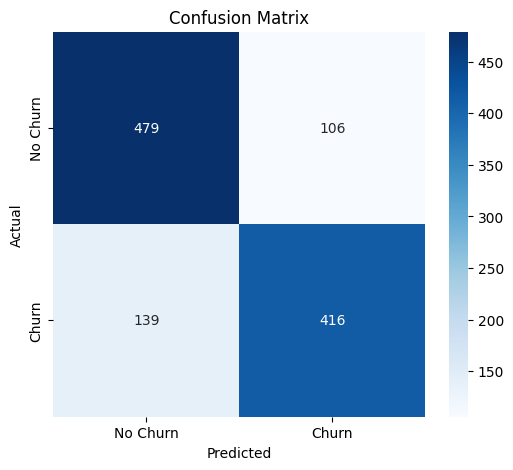

In [125]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn','Churn'], yticklabels=['No Churn','Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


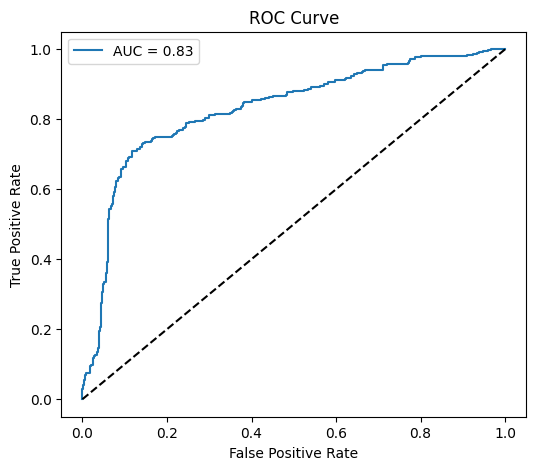

In [137]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 83% of the time, the model will assign a higher probability to the churner than to a non-churner.

## In other words, the model is correctly distinguishing churners from non-churners 83% of the time in ranking terms.

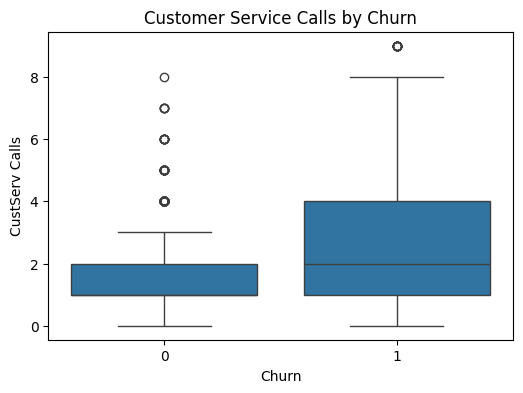

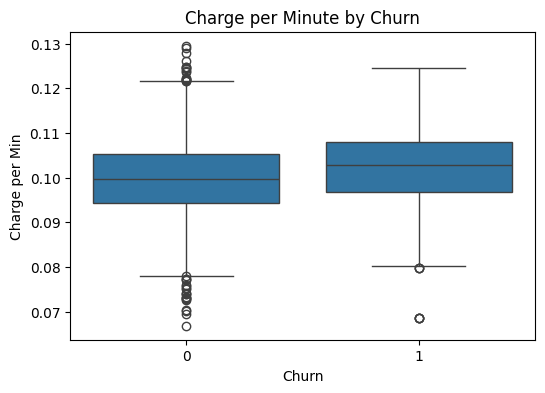

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='CustServ Calls', data=churn)
plt.title('Customer Service Calls by Churn')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='Charge per Min', data=churn)
plt.title('Charge per Minute by Churn')
plt.show()
